In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

In [8]:
merged_df = pd.read_csv('../Data/merged.csv')
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='mixed', dayfirst=True, errors='coerce')
merged_df = merged_df.sort_values(["Symbol", "Date"])

In [9]:
lag_cols  = [f"Close_lag{k}" for k in range(1, 11)]

cutoff_date = merged_df["Date"].quantile(0.8)

train = merged_df[merged_df["Date"] <= cutoff_date]
test  = merged_df[merged_df["Date"]  > cutoff_date]

X_train, y_train = train[lag_cols], train["Profit"]
X_test,  y_test  = test [lag_cols], test ["Profit"]

In [12]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy  = accuracy_score (y_test, y_pred)
print(f"Accuracy : {accuracy:.4f}")

roc_auc   = roc_auc_score  (y_test, y_pred_proba)
print(f"ROC-AUC  : {roc_auc:.4f}")

coef_table = pd.Series(model.coef_[0], index=lag_cols)
print("\nLogistic-regression coefficients:")
print(coef_table.round(5))

Accuracy : 0.4929
ROC-AUC  : 0.5008

Logistic-regression coefficients:
Close_lag1    -0.00111
Close_lag2     0.00073
Close_lag3    -0.00209
Close_lag4     0.00121
Close_lag5     0.00234
Close_lag6    -0.00062
Close_lag7     0.00152
Close_lag8    -0.00479
Close_lag9     0.00216
Close_lag10    0.00068
dtype: float64


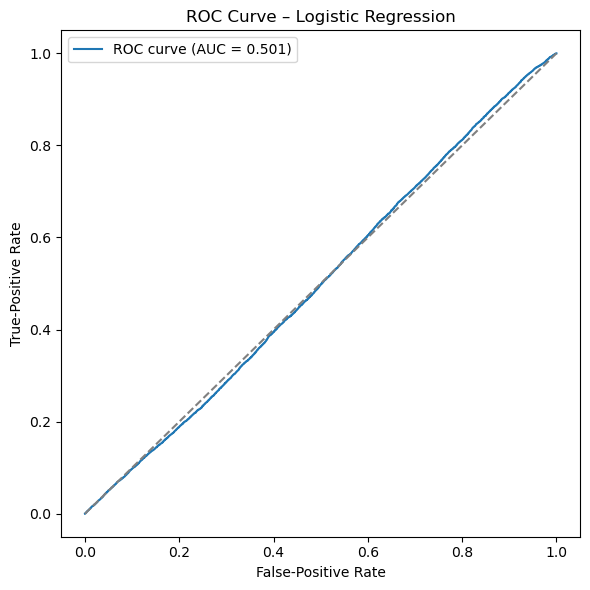

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
plt.xlabel("False-Positive Rate")
plt.ylabel("True-Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.tight_layout()
plt.show()